### This program uses an artificial recurrent neural network namely **Long Short Term Memory(LSTM)** to predict the closing stock price of a corporation(**apple Inc**) using the past 60 day stock

In [ ]:
# Importing packages
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install --upgrade pandas-datareader


In [ ]:
# importing the dataset
apple_data = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2022-07-07')
#print dataframe
apple_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747408
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.530350
2022-07-01,139.039993,135.660004,136.039993,138.929993,71051600.0,138.737274
2022-07-05,141.610001,136.929993,137.770004,141.559998,73353800.0,141.363632


In [ ]:
# structure of the data
apple_data.shape

(2645, 6)

In [ ]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2645 entries, 2012-01-03 to 2022-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2645 non-null   float64
 1   Low        2645 non-null   float64
 2   Open       2645 non-null   float64
 3   Close      2645 non-null   float64
 4   Volume     2645 non-null   float64
 5   Adj Close  2645 non-null   float64
dtypes: float64(6)
memory usage: 144.6 KB


In [ ]:
# printing descriptive statistics
apple_data.describe()


,High,Low,Open,Close,Volume,Adj Close
count,2645.000000,2645.000000,2645.000000,2645.000000,2.645000e+03,2645.000000
mean,54.945800,53.766080,54.349313,54.378007,2.092278e+08,52.497591
std,45.221027,44.086236,44.645503,44.676813,1.735800e+08,45.240814
min,14.271429,13.753571,13.856071,13.947500,4.100000e+07,12.084599
25%,24.146429,23.673214,23.924999,23.900000,9.913000e+07,21.606512
50%,35.730000,35.277500,35.527500,35.547501,1.449440e+08,33.485634
75%,64.402496,61.762501,62.685001,63.215000,2.572748e+08,62.180271
max,182.940002,179.119995,182.630005,182.009995,1.506120e+09,181.259933


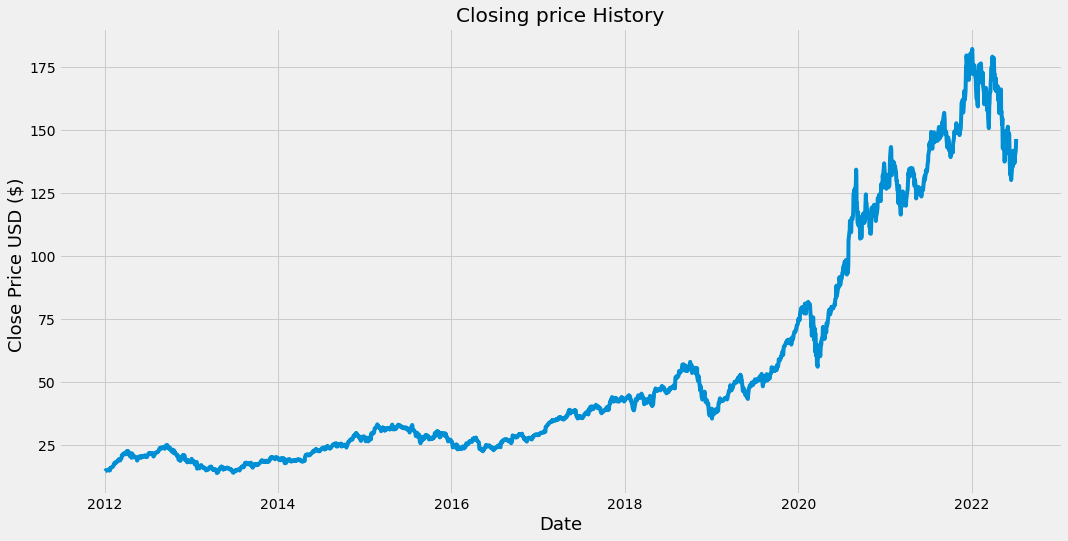

In [ ]:
# Closing price visualization
plt.figure(figsize=(16,8))
plt.title('Closing price History')
plt.plot(apple_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) ',fontsize=18 )
plt.show()


- From the above visual apple stock closing price seems have an upward trend over the years indicating its a good stock to invest in. Let assume you bought the stock in 2014 at price of 24 dollars and later sold it at the start of 2022 where we have peak price then your profit guess is good as mine 😊💸

In [ ]:
# create a new dataframe with only the Close column
data = apple_data.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# Getting the Number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

2116

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.75931574],
       [0.76740797],
       [0.78781709]])

In [ ]:
# Creating the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Splitting the data
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [ ]:
#Converting the training datasets to arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2056, 60, 1)

In [ ]:
from keras.engine.sequential import Sequential
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2056/2056 [==============================] - 32s 14ms/step - loss: 2.6856e-04


In [ ]:
# Creating the testing dataset
#creating also a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Converting the data to a array
x_test = np.array(x_test)

In [ ]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [ ]:
# getting the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# model evaluation using (RMSE)
rmse = np.sqrt( np.mean(predictions -y_test)**2)
rmse

0.9987555433536522

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


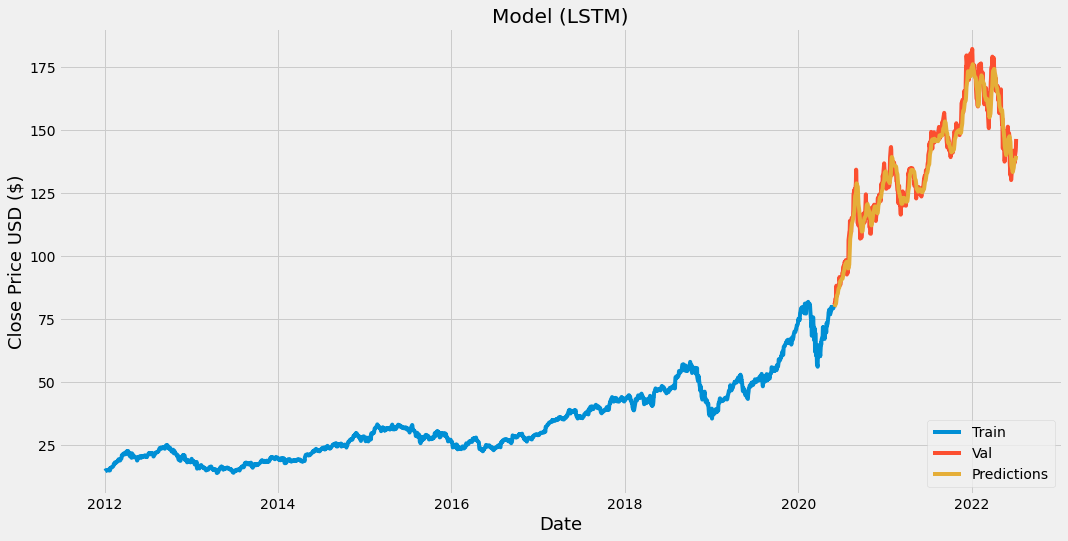

In [ ]:
# plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model (LSTM)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show()

- From the above visual it evident the model performed well since the validation line is very close to the prediction line having been trained with the the blue line data(train data set)

In [ ]:
# Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-06-02,80.834999,79.805641
2020-06-03,81.279999,80.052078
2020-06-04,80.580002,80.359016
2020-06-05,82.875000,80.572578
2020-06-08,83.364998,81.005348
...,...,...
2022-06-30,136.720001,137.911636
2022-07-01,138.929993,138.093109
2022-07-05,141.559998,138.318665


In [ ]:
# get the apple containing this month data
df = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2022-08-23')
# Creating the dataframe
new_df = df.filter(['Close'])
# getting the las 60 day closing price values andconvert it into array
day_60 = new_df[-60:].values
# scaling the data
day_60_scaled = scaler.transform(day_60)
# creating an empty list
X_test = []
# appending the past 60 days
X_test.append(day_60_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshaping the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# getting the predicted scaled price
pred_price = model.predict(X_test)
#removing the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[168.93286]]


In [ ]:
df_2 = web.DataReader('AAPL', data_source = 'yahoo', start='2022-08-24', end='2022-08-24')
print(df_2['Close'])

Date
2022-08-24    167.529999
Name: Close, dtype: float64


- The Model performed well with a minor difference of **1.402861**